In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

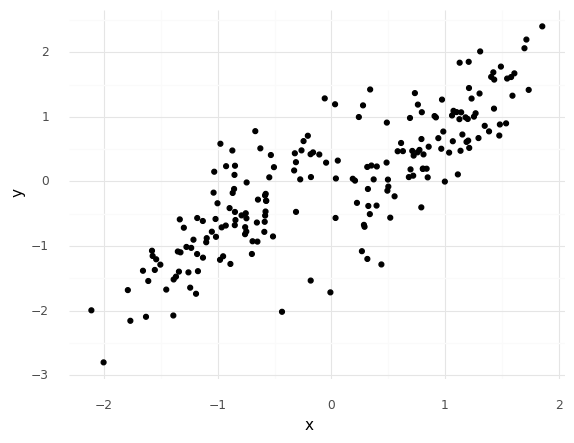

<ggplot: (165964579066)>

In [2]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

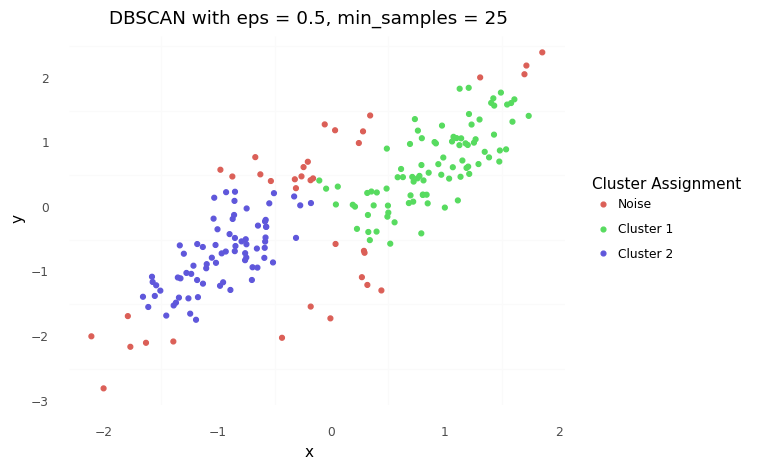

<ggplot: (165965728765)>

In [3]:
# dbscan and plot
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [4]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6169609560667532

In [5]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39760284702143056

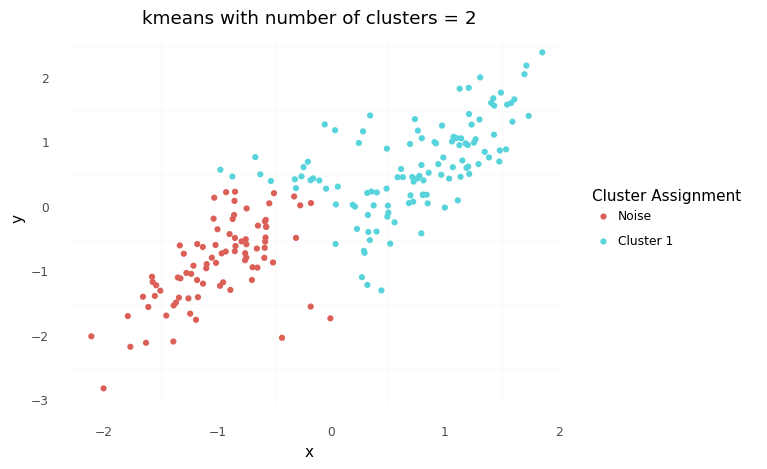

<ggplot: (165965856389)>

In [6]:

# kmeans and plot
k=2 #number of clusters
db1_kmeans=KMeans(n_clusters=k).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1_kmeans.labels_)))]

d1["assignments"] = db1_kmeans.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 2"))

In [7]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.5167961016946535

In [8]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.464


In [9]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.509


In [10]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.325


In [11]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(d1)
score = silhouette_score(d1, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.509


Data set 1


DBSCAN = # grab only clustered data points =  61% , #over all of data = 39%


KMeans =51.67%


Hierarchical Clustering = 50.9 # the best in "sigle and average "


## Dataset 2

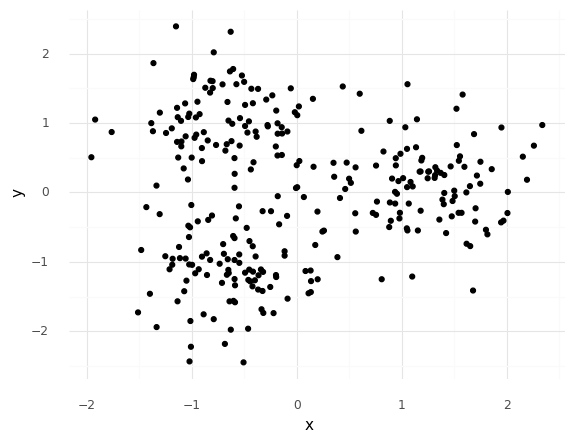

<ggplot: (165965857820)>

In [12]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

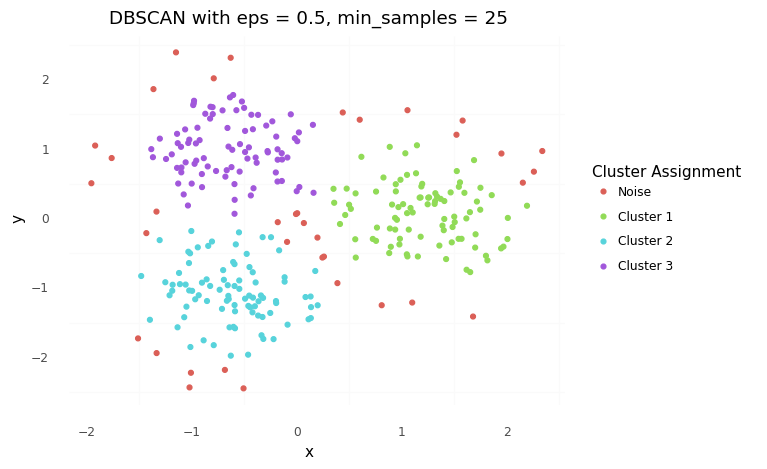

<ggplot: (165965878583)>

In [13]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [14]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall 
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6140043544818719
0.4803831307840633


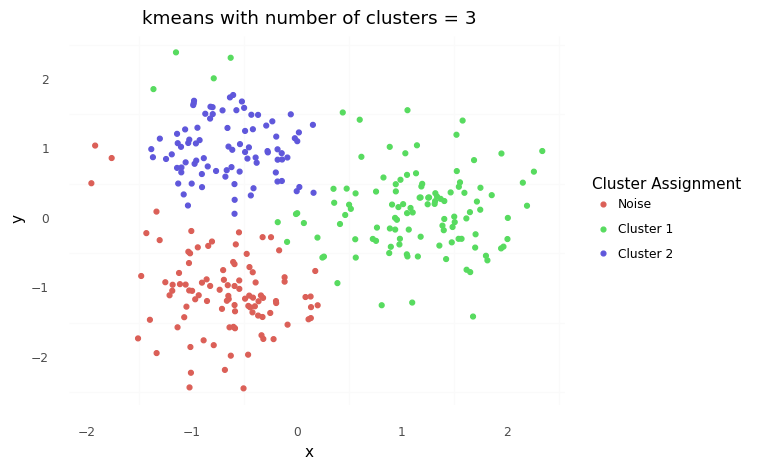

<ggplot: (165966469355)>

In [15]:
# kmeans and plot
k=3 #number of clusters
db2_kmeans=KMeans(n_clusters=k).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2_kmeans.labels_)))]

d2["assignments"] = db2_kmeans.labels_

(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

In [16]:
# overall 
silhouette_score(d2[["x","y"]], d2["assignments"])

0.5078162539673805

In [17]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.610


In [18]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.392


In [19]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.609


In [20]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(d2)
score = silhouette_score(d2, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.610


Data set 2

DBSCAN = # grab only clustered data points = 61% , #over all of data = 48%

KMeans =54.86%

Hierarchical Clustering = 62.3 # the best in "all"

## Dataset 3

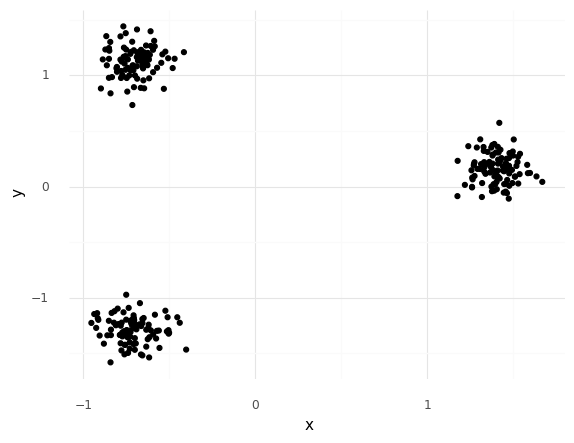

<ggplot: (165966639538)>

In [21]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

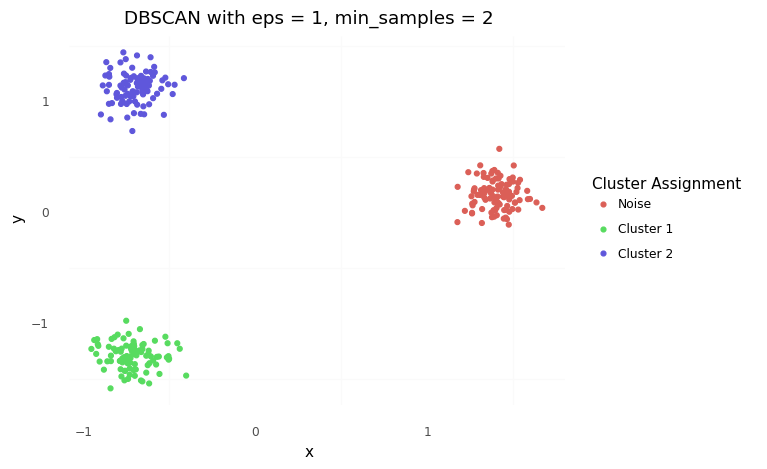

<ggplot: (165966475289)>

In [22]:
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [23]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


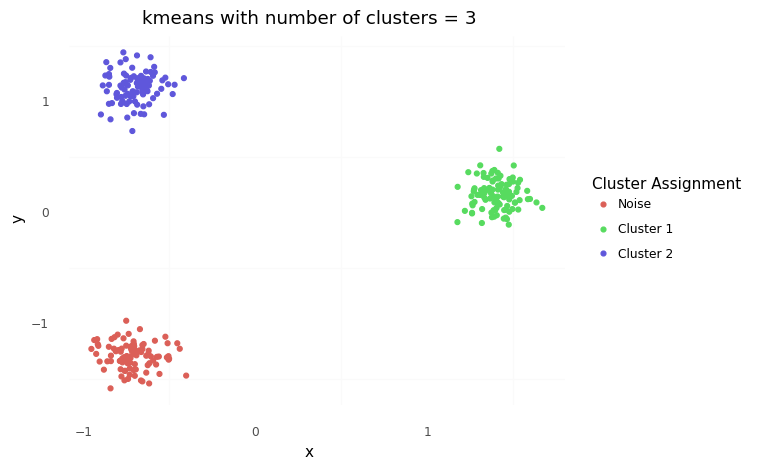

<ggplot: (165966668770)>

In [24]:
# kmeans and plot
k=3 #number of clusters
db3_kmeans=KMeans(n_clusters=k).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3_kmeans.labels_)))]

d3["assignments"] = db3_kmeans.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

In [25]:
# overall 
silhouette_score(d3[["x","y"]], d3["assignments"])

0.913619050733588

In [26]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d3)
score = silhouette_score(d3, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.922


In [27]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d3)
score = silhouette_score(d3, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.922


In [28]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d3)
score = silhouette_score(d3, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.922


In [29]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(d3)
score = silhouette_score(d3, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.922


Data set 3

DBSCAN = # grab only clustered data points = 91.36% , #over all of data = 91.36%

KMeans =91.3%

Hierarchical Clustering = 92.1 # the best in "all"

## Dataset 4

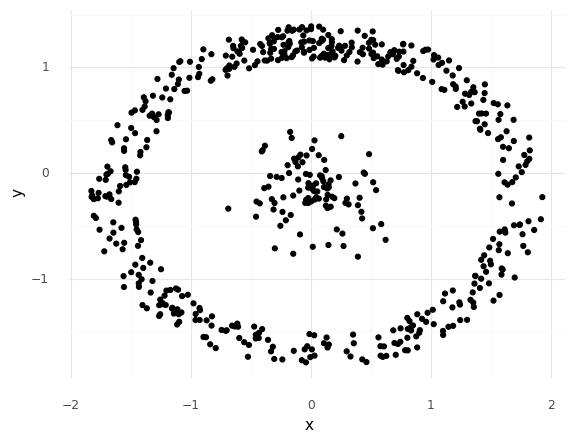

<ggplot: (165966841838)>

In [30]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

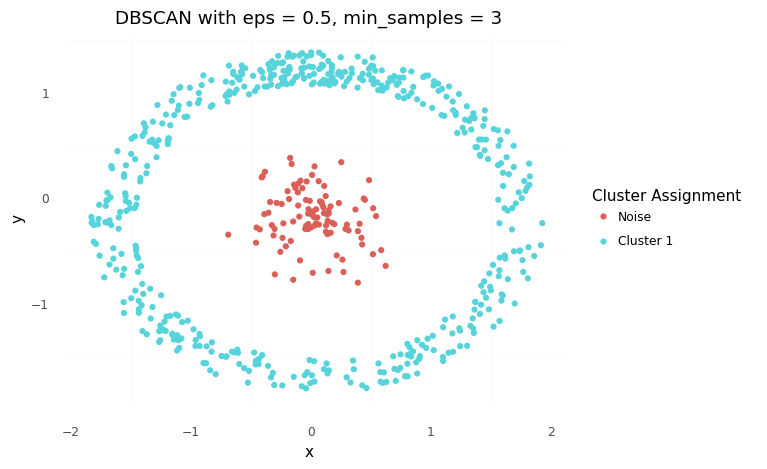

<ggplot: (165966822388)>

In [31]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [32]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.04291147775491326
-0.04291147775491326


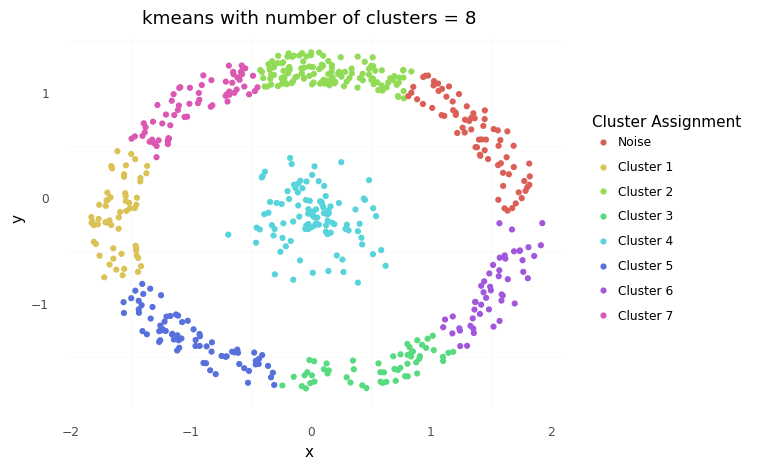

<ggplot: (165966670150)>

In [33]:
# kmeans and plot
k=8 #number of clusters
db4_kmeans=KMeans(n_clusters=k).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4_kmeans.labels_)))]

d4["assignments"] = db4_kmeans.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 8"))

In [34]:
# overall 
silhouette_score(d4[["x","y"]], d4["assignments"])

0.5266214130531358

In [35]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d4)
score = silhouette_score(d4, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.519


In [36]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d4)
score = silhouette_score(d4, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.519


In [37]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d4)
score = silhouette_score(d4, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.492


In [38]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(d4)
score = silhouette_score(d4, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.519


Data set 4

DBSCAN = # grab only clustered data points = -.4% , #over all of data = -.4%

KMeans =49.7%

Hierarchical Clustering = 57.2 # the best in "average "

### Compare

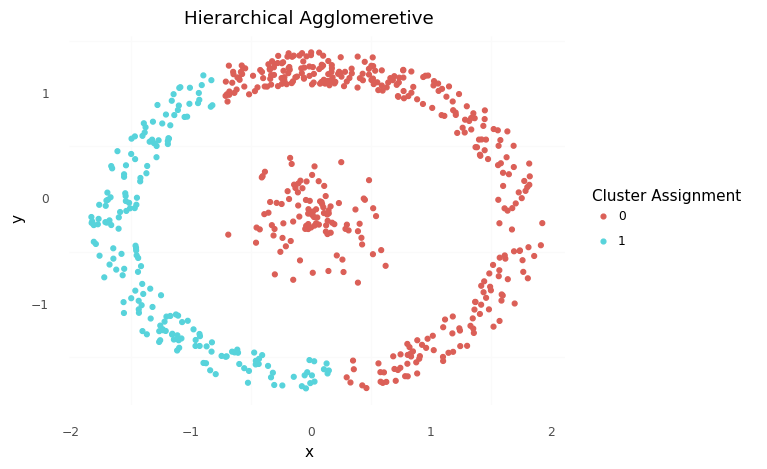

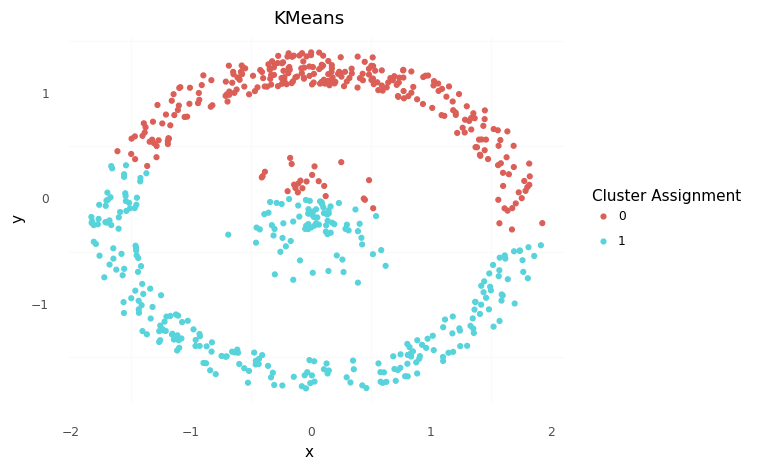

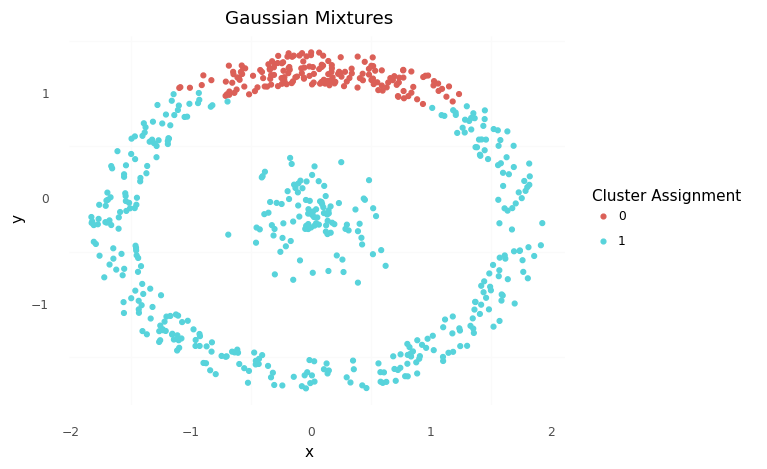

In [39]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

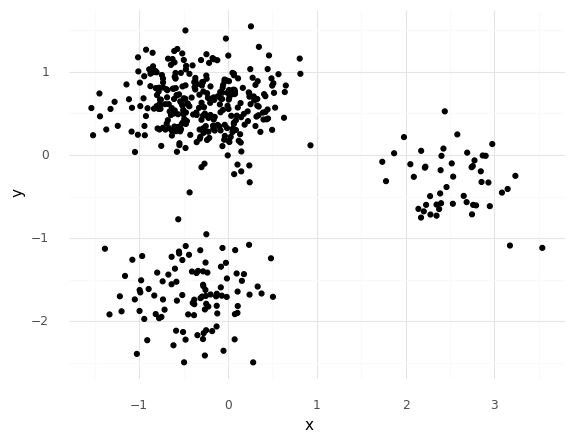

<ggplot: (165967251466)>

In [40]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

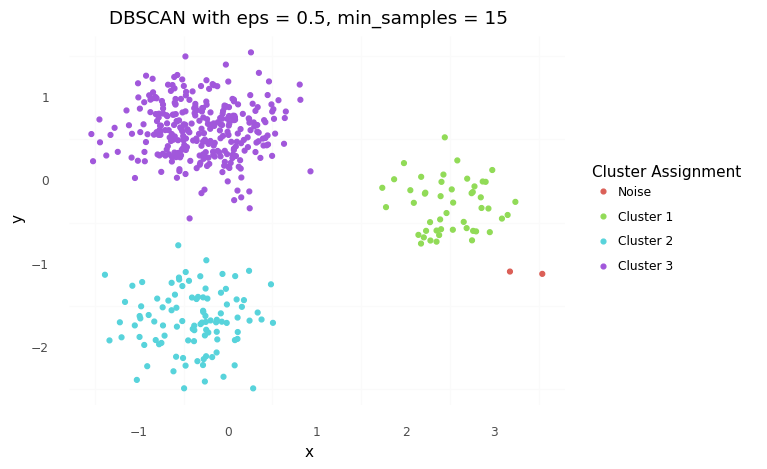

<ggplot: (165966673089)>

In [41]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [42]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


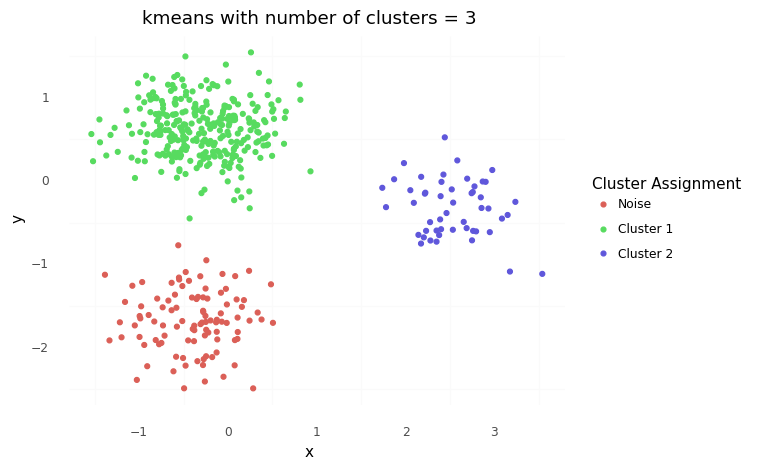

<ggplot: (165968558870)>

In [43]:
# kmeans and plot
k=3 #number of clusters
db5_kmeans=KMeans(n_clusters=k).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5_kmeans.labels_)))]

d5["assignments"] = db5_kmeans.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

In [44]:
# overall 
silhouette_score(d5[["x","y"]], d5["assignments"])

0.7043537508086658

In [45]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d5)
score = silhouette_score(d5, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.730


In [46]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d5)
score = silhouette_score(d5, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.730


In [47]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d5)
score = silhouette_score(d5, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.730


In [48]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(d5)
score = silhouette_score(d5, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.730


Data set 5

DBSCAN = # grab only clustered data points = 70.4% , #over all of data = 67.1%

KMeans =70.4%

Hierarchical Clustering = 76.6% # the best in "all"

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

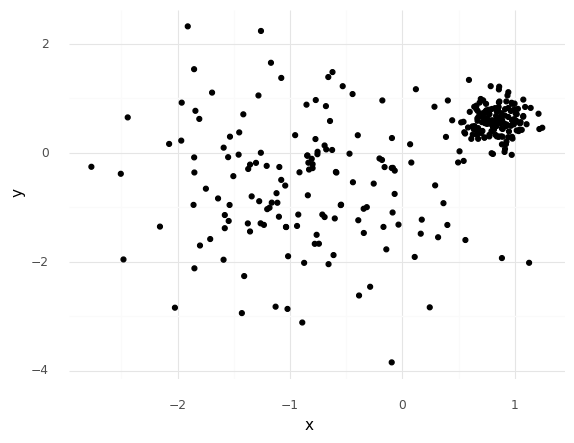

<ggplot: (165967262546)>

In [49]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [52]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors( ) 

nn.fit(d6[["x", "y"]])

distances, neighbors = nn.kneighbors(d6[["x", "y"]])

distances

array([[0.        , 0.03690981, 0.04037236, 0.04597748, 0.05401608],
       [0.        , 0.05516926, 0.08888159, 0.08986399, 0.12363566],
       [0.        , 0.01648388, 0.02195778, 0.02314588, 0.03917653],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794, 0.09791749],
       [0.        , 0.45863691, 0.62402991, 0.6937056 , 0.74851932],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 , 0.46639806]])

In [53]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

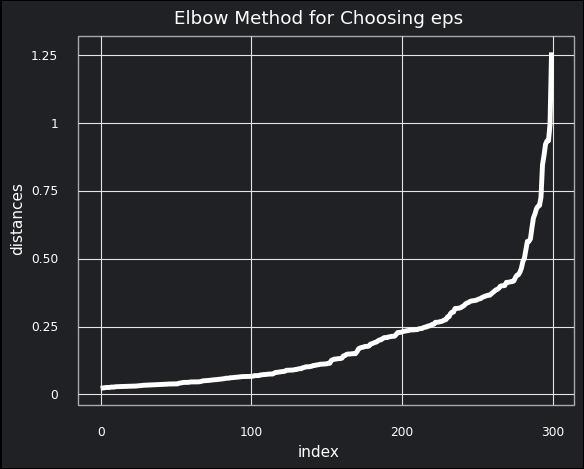

<ggplot: (165968579976)>

In [54]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

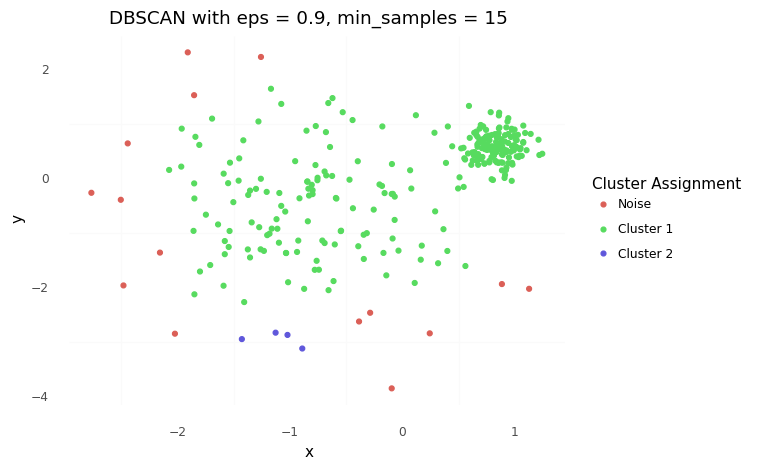

<ggplot: (165969349979)>

In [55]:
db6 = DBSCAN(eps = 0.45, min_samples = 3).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [56]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.49007245503214775
0.39604529088370405


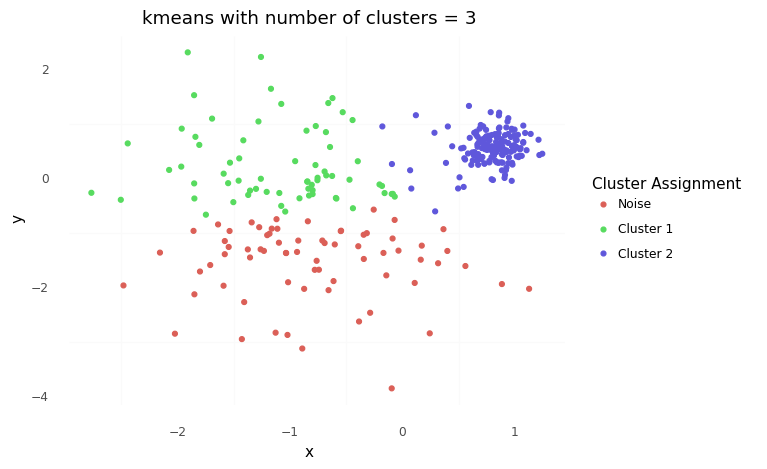

<ggplot: (165968989868)>

In [57]:
# kmeans and plot
k=3 #number of clusters
db6_kmeans=KMeans(n_clusters=k).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6_kmeans.labels_)))]

d6["assignments"] = db6_kmeans.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "kmeans with number of clusters = 3"))

In [58]:
# overall 
silhouette_score(d6[["x","y"]], d6["assignments"])

0.5861497443577426

In [59]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(d6)
score = silhouette_score(d6, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.646


In [60]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(d6)
score = silhouette_score(d6, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.573


In [61]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(d6)
score = silhouette_score(d6, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.646


In [62]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(d6)
score = silhouette_score(d6, clustering.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.646


Data set 6

DBSCAN = # grab only clustered data points = 49% , #over all of data = 39.6%

KMeans =58.6%

Hierarchical Clustering = 67.5%   